In [23]:
#!pip3 install requests
#!pip3 install json
#!pip3 install simplejson
#!pip3 install cassandra-driver
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install matplotib #  - had to do this from command line at linux box, this didn't work from notebook

import requests
import json
import simplejson as json
'''
export ASTRA_DB_ID=c487d9f5-886c-4615-a342-ecfb181e8599
export ASTRA_DB_REGION=us-east1
export ASTRA_DB_USERNAME=ken
export ASTRA_DB_KEYSPACE=ken
export ASTRA_DB_PASSWORD=cbug2021
db = kendb
key = ken
username = ken
pw = cbug2021
'''
headers1 = {
    "Accept": "application/json",
    "Content-Type": "application/json", 
    
}

urlprefix = "https://c487d9f5-886c-4615-a342-ecfb181e8599-us-east1"
userpw = {'username': 'ken', 'password' : 'cbug2021'}

In [24]:
!python3 -c 'import cassandra; print (cassandra.__version__)'

3.24.0


In [25]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': '/home/ken/datastax/secure-connect-kendb.zip'
}
auth_provider = PlainTextAuthProvider('ken', 'cbug2021')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")
    
session = cluster.connect('ken')
print(session)

4.0.0.687


In [26]:
import uuid 
  
# Printing random id using uuid1() 
print ("The random id using uuid1() is : ",end="") 
print (uuid.uuid1()) 

The random id using uuid1() is : 5b78f40a-60d0-11eb-99aa-4401bb912b5d


In [27]:
# do a simple insert into Products table 
from datetime import date
from random import seed
from random import random
from random import randint

seed(1)
for i  in range(20): 
    today = date.today()
    xi = uuid.uuid1()
    xc = date.today()
    xd =  'some description'
    xn = 'Product' + str(i)
    xp = 12.50 + randint(0, 10)
    #uuid.uuid1()
    session.execute(
        """
        INSERT INTO products (id, created, description, name, price )
        VALUES (%s, %s, %s, %s, %s)
        """,
            (xi, date.today(), xd, xn, xp)
        )

rows = session.execute('SELECT * from products')
for row in rows:
    print (row.id, row.created, row.description, row.name, row.price)
    


7b92f574-60d0-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product10 15.5
7b92f578-60d0-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product14 18.5
7b92f575-60d0-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product11 13.5
076674b8-60c5-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product8 22.5
65e6fdd1-5be7-11eb-ae4d-4401bb912b5d 2021-01-21 00:00:00  some description some name 12.5
076674c2-60c5-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product18 19.5
076674b1-60c5-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product1 21.5
ccd93f83-60c2-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product11 13.5
9cf66543-5cf6-11eb-ae4d-4401bb912b5d 2021-01-22 00:00:00 some description Product19 14.5
107f4ef2-60c2-11eb-99aa-4401bb912b5d 2021-01-27 00:00:00 some description Product14 18.5
f00b299f-5c11-11eb-ae4d-4401bb912b5d 2021-01-21 00:00:00  some description some name 12.5
b4ccf807-5cd6-11eb-ae

In [28]:
count = session.execute('Select count(1) from products')
for rowcount in  count:
    print(rowcount)

Row(count=100)


In [29]:
rows = session.execute('SELECT * from spacecraft_journey_catalog limit 10')
for row in rows:
    s = ""
    for i in range(6):
        s+=str(row[i])
        s+=','
    print (s)

sts-9,a7d80000-b570-11c1-8080-808080808080,False,1983-12-08 23:47:00,1983-11-28 16:00:00,First Spacelab (orbital laboratory) mission. First ESA astronaut, first West German astronaut and first non-American on US flight (Merbold).,
datastax8,e2909d80-85e7-11eb-8080-808080808080,False,2021-12-21 06:44:11,2021-04-04 10:23:46,Go to edge of solar system,
datastax8,2905cf80-84f6-11eb-8080-808080808080,False,2021-12-23 01:02:48,2021-01-10 16:22:45,Bring supplies to space center,
datastax8,ec0aa780-819a-11eb-8080-808080808080,False,2021-05-07 23:17:22,2021-01-05 06:34:10,Push the boundaries of human exploration,
datastax8,c99b5180-8015-11eb-8080-808080808080,False,2021-10-13 09:20:43,2021-08-14 08:04:47,Bring supplies to space center,
datastax8,1c89b600-7d43-11eb-8080-808080808080,False,2021-01-18 01:09:38,2021-01-08 18:09:15,Crew rotation,
datastax8,7aef5f80-7c83-11eb-8080-808080808080,False,2021-05-08 22:47:30,2021-01-10 11:37:26,Push the boundaries of human exploration,
datastax8,d59ee500-7

In [12]:
lookup_stmt = session.prepare('SELECT spacecraft_name, journey_id, active, end, start, summary FROM spacecraft_journey_catalog limit 10')

rows = session.execute(lookup_stmt)
for row in rows:
    print (row.spacecraft_name, row.journey_id, row.active, row.end, row.start, row.summary)
    



sts-9 a7d80000-b570-11c1-8080-808080808080 False 1983-12-08 23:47:00 1983-11-28 16:00:00 First Spacelab (orbital laboratory) mission. First ESA astronaut, first West German astronaut and first non-American on US flight (Merbold).
datastax8 e2909d80-85e7-11eb-8080-808080808080 False 2021-12-21 06:44:11 2021-04-04 10:23:46 Go to edge of solar system
datastax8 2905cf80-84f6-11eb-8080-808080808080 False 2021-12-23 01:02:48 2021-01-10 16:22:45 Bring supplies to space center
datastax8 ec0aa780-819a-11eb-8080-808080808080 False 2021-05-07 23:17:22 2021-01-05 06:34:10 Push the boundaries of human exploration
datastax8 c99b5180-8015-11eb-8080-808080808080 False 2021-10-13 09:20:43 2021-08-14 08:04:47 Bring supplies to space center
datastax8 1c89b600-7d43-11eb-8080-808080808080 False 2021-01-18 01:09:38 2021-01-08 18:09:15 Crew rotation
datastax8 7aef5f80-7c83-11eb-8080-808080808080 False 2021-05-08 22:47:30 2021-01-10 11:37:26 Push the boundaries of human exploration
datastax8 d59ee500-7453-11e

In [13]:
rows = session.execute(lookup_stmt)
for (spacecraft_name, journey_id, active, end, start, summary) in rows:
    print (spacecraft_name, journey_id, active, end, start, summary)



sts-9 a7d80000-b570-11c1-8080-808080808080 False 1983-12-08 23:47:00 1983-11-28 16:00:00 First Spacelab (orbital laboratory) mission. First ESA astronaut, first West German astronaut and first non-American on US flight (Merbold).
datastax8 e2909d80-85e7-11eb-8080-808080808080 False 2021-12-21 06:44:11 2021-04-04 10:23:46 Go to edge of solar system
datastax8 2905cf80-84f6-11eb-8080-808080808080 False 2021-12-23 01:02:48 2021-01-10 16:22:45 Bring supplies to space center
datastax8 ec0aa780-819a-11eb-8080-808080808080 False 2021-05-07 23:17:22 2021-01-05 06:34:10 Push the boundaries of human exploration
datastax8 c99b5180-8015-11eb-8080-808080808080 False 2021-10-13 09:20:43 2021-08-14 08:04:47 Bring supplies to space center
datastax8 1c89b600-7d43-11eb-8080-808080808080 False 2021-01-18 01:09:38 2021-01-08 18:09:15 Crew rotation
datastax8 7aef5f80-7c83-11eb-8080-808080808080 False 2021-05-08 22:47:30 2021-01-10 11:37:26 Push the boundaries of human exploration
datastax8 d59ee500-7453-11e

In [14]:
rows = session.execute(lookup_stmt)
for row in rows:
    print (row[0], row[1], row[2], row[3], row[4], row[5])

sts-9 a7d80000-b570-11c1-8080-808080808080 False 1983-12-08 23:47:00 1983-11-28 16:00:00 First Spacelab (orbital laboratory) mission. First ESA astronaut, first West German astronaut and first non-American on US flight (Merbold).
datastax8 e2909d80-85e7-11eb-8080-808080808080 False 2021-12-21 06:44:11 2021-04-04 10:23:46 Go to edge of solar system
datastax8 2905cf80-84f6-11eb-8080-808080808080 False 2021-12-23 01:02:48 2021-01-10 16:22:45 Bring supplies to space center
datastax8 ec0aa780-819a-11eb-8080-808080808080 False 2021-05-07 23:17:22 2021-01-05 06:34:10 Push the boundaries of human exploration
datastax8 c99b5180-8015-11eb-8080-808080808080 False 2021-10-13 09:20:43 2021-08-14 08:04:47 Bring supplies to space center
datastax8 1c89b600-7d43-11eb-8080-808080808080 False 2021-01-18 01:09:38 2021-01-08 18:09:15 Crew rotation
datastax8 7aef5f80-7c83-11eb-8080-808080808080 False 2021-05-08 22:47:30 2021-01-10 11:37:26 Push the boundaries of human exploration
datastax8 d59ee500-7453-11e

In [30]:
lookup_stmt = session.prepare("SELECT table_name FROM system_schema.tables WHERE keyspace_name = 'ken'")
rows = session.execute(lookup_stmt)
for row in rows:
    print (row)
    
'''
Row(table_name='spacecraft_journey_catalog')
Row(table_name='spacecraft_location_over_time')
Row(table_name='spacecraft_pressure_over_time')
Row(table_name='spacecraft_speed_over_time')
Row(table_name='spacecraft_temperature_over_time')
'''

Row(table_name='chipotle_stores')
Row(table_name='products')
Row(table_name='spacecraft_journey_catalog')
Row(table_name='spacecraft_location_over_time')
Row(table_name='spacecraft_pressure_over_time')
Row(table_name='spacecraft_speed_over_time')
Row(table_name='spacecraft_temperature_over_time')


"\nRow(table_name='spacecraft_journey_catalog')\nRow(table_name='spacecraft_location_over_time')\nRow(table_name='spacecraft_pressure_over_time')\nRow(table_name='spacecraft_speed_over_time')\nRow(table_name='spacecraft_temperature_over_time')\n"

In [16]:
lookup_stmt2 = session.prepare("SELECT * FROM system_schema.columns WHERE keyspace_name = 'ken' AND table_name = 'spacecraft_location_over_time' limit 1 ")
lookup_stmt3 = session.prepare("SELECT * FROM system_schema.columns WHERE keyspace_name = 'ken' AND table_name = 'spacecraft_pressure_over_time' limit 1 ")
lookup_stmt4 = session.prepare("SELECT * FROM system_schema.columns WHERE keyspace_name = 'ken' AND table_name = 'spacecraft_speed_over_time' limit 1")
lookup_stmt5 = session.prepare("SELECT * FROM system_schema.columns WHERE keyspace_name = 'ken' AND table_name = 'spacecraft_temperature_over_time' limit 1 ")


lookup_stmt = session.prepare("Select * From spacecraft_journey_catalog limit 1 ")
lookup_stmt2 = session.prepare("Select * From spacecraft_location_over_time limit 1 ")
lookup_stmt3 = session.prepare("Select * from spacecraft_pressure_over_time limit 1 ")
lookup_stmt4 = session.prepare("Select * from spacecraft_speed_over_time limit 1 ")
lookup_stmt5 = session.prepare("Select * from spacecraft_temperature_over_time limit 1 ")

lookup_stmt6 = session.prepare("Select spacecraft_name, reading_time, temperature from spacecraft_temperature_over_time limit 5")
lookup_stmt7 = session.prepare("Select spacecraft_name, reading_time, speed from spacecraft_speed_over_time   ")
lookup_stmt8 = session.prepare("Select spacecraft_name, reading_time, pressure from spacecraft_pressure_over_time   ")

rows = session.execute(lookup_stmt8)
for row in rows:
    print (row)
    
'''
Row(spacecraft_name='sts-9', journey_id=UUID('a7d80000-b570-11c1-8080-808080808080'), active=False, end=datetime.datetime(1983, 12, 8, 23, 47), start=datetime.datetime(1983, 11, 28, 16, 0), summary='First Spacelab (orbital laboratory) mission. First ESA astronaut, first West German astronaut and first non-American on US flight (Merbold).')
Row(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), location=location_udt(x_coordinate=14994.0, y_coordinate=14997.0, z_coordinate=14993.0), location_unit='km,km,km')
Row(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), pressure=99.73, pressure_unit='kPa')
Row(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), speed=34996.0, speed_unit='km/h')
Row(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), temperature=70.18, temperature_unit='fahrenheit')
'''

Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), pressure=99.73)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 38), pressure=100.56)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 37), pressure=99.6)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 36), pressure=99.15)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 35), pressure=100.41)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 34), pressure=100.21)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 33), pressure=99.37)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 32), pressure=99.56)
Row(spacecraft_name='apollo11', reading_time=datetime.datetime(1969, 7, 16, 13, 49, 31), pressure=99.33)
Row(spacecraft_name='apollo11', reading_time=datetime

"\nRow(spacecraft_name='sts-9', journey_id=UUID('a7d80000-b570-11c1-8080-808080808080'), active=False, end=datetime.datetime(1983, 12, 8, 23, 47), start=datetime.datetime(1983, 11, 28, 16, 0), summary='First Spacelab (orbital laboratory) mission. First ESA astronaut, first West German astronaut and first non-American on US flight (Merbold).')\nRow(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), location=location_udt(x_coordinate=14994.0, y_coordinate=14997.0, z_coordinate=14993.0), location_unit='km,km,km')\nRow(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), pressure=99.73, pressure_unit='kPa')\nRow(spacecraft_name='apollo11', journey_id=UUID('fc01e800-9954-11b1-8080-808080808080'), reading_time=datetime.datetime(1969, 7, 16, 13, 49, 39), speed=34996.0, speed_unit='km/h')\nRow(spacecraft_name='apollo

In [17]:
lookup_stmt = session.prepare("SELECT *   from chipotle_stores ");
stores = session.execute(lookup_stmt)
arr = []
store_count = 0

for store in stores:
    arr.append(store.location)    
    arr.append(store.state)
    arr.append(store.latitude)
    arr.append(store.longitude)
    #print(store_count, store)
    store_count = store_count+1
    


    

for row in range(store_count):
    col = row*4
    print(row, '-' ,  arr[col], arr[col+1], arr[col+2] , arr[col+3])



0 - Panorama City California 34.21576549591313 -118.4484124987124
1 - Naperville Illinois 41.71182345757522 -88.20511906702484
2 - Wilkes Barre Pennsylvania 41.2435024 -75.8428947
3 - Monterey Park California 34.03839617176134 -118.14455450980438
4 - Jamaica New York 40.703708500000005 -73.7989613
5 - Cape Coral Florida 26.610982702781204 -81.94054500320021
6 - Akron Ohio 41.0970929809026 -81.54395430983902
7 - Effingham Illinois 39.137954216448655 -88.56590846932886
8 - West Bountiful Utah 40.890837055458974 -111.89262856157568
9 - Nashville Tennessee 36.12949220015436 -86.85315586664262
10 - Seal Beach California 33.782980697390315 -118.07234152637191
11 - Rye Brook New York 41.00357218075789 -73.68328068812713
12 - Destin Florida 30.3899771 -86.42493520000001
13 - Marlton New Jersey 39.90623710000001 -74.9363638
14 - North Dartmouth Massachusetts 41.639475712003005 -70.99168797845522
15 - Woodmere Ohio 41.46274633 -81.4806345
16 - Northville Michigan 42.42403597052689 -83.4337969256

684 - New Hyde Park New York 40.7580426 -73.68925440000001
685 - Tonawanda New York 42.980157473662395 -78.86930143039132
686 - Medford Massachusetts 42.40599936777244 -71.08285075070961
687 - Plantation Florida 26.147191 -80.25638599999999
688 - Iowa City Iowa 41.658216100000004 -91.535465
689 - Dulles Virginia 39.006242 -77.437158
690 - Irving Texas 32.922099562468574 -96.99437746686476
691 - Brandon Florida 27.893182399999997 -82.27239490000001
692 - Roswell Georgia 34.0439237 -84.3422444
693 - Swampscott Massachusetts 42.48177309938848 -70.90378910296046
694 - Nashua New Hampshire 42.78285072690204 -71.50485844778086
695 - Augusta Georgia 33.490445799999996 -82.08004090000001
696 - Miamisburg Ohio 39.59701210000001 -84.2314135
697 - Norcross Georgia 33.9082515 -84.2057184
698 - Chicago Illinois 41.77998374448471 -87.64511749125887
699 - Crestwood Illinois 41.64942357682577 -87.7387279322765
700 - Southington Connecticut 41.638174 -72.87337009999999
701 - Middletown New York 41.4551

1412 - Mission Viejo California 33.557971492152284 -117.6689722662411
1413 - Hinesville Georgia 31.82191319999999 -81.5990953
1414 - Greenville North Carolina 35.58431380050536 -77.37091632514858
1415 - Springdale Ohio 39.28974432241263 -84.46611472669555
1416 - Hagerstown Maryland 39.65965626685761 -77.74470580514492
1417 - Fayetteville Georgia 33.4722595 -84.4428863
1418 - Port Richey Florida 28.29081058897905 -82.7119125003145
1419 - Palm Harbor Florida 28.07317466907305 -82.7382977190582
1420 - North Andover Massachusetts 42.676052899999995 -71.1317931
1421 - Hopkins Minnesota 44.92422978165354 -93.40994774689163
1422 - Santa Clarita California 34.394448700000005 -118.46276100000001
1423 - Stockton California 37.994668901660795 -121.31343740444309
1424 - Chamblee Georgia 33.884559493961305 -84.31577334085944
1425 - Marina Del Rey California 33.979174 -118.4383297
1426 - Lakewood Ohio 41.48476913556063 -81.80115792295692
1427 - La Verne California 34.11205096859536 -117.762246722930

In [18]:

lookup_stmt = session.prepare("SELECT count(1)  from chipotle_stores where state='California' allow filtering");
lookup_stmt = session.prepare("SELECT location, state  from chipotle_stores ");
lookup_stmt = session.prepare("SELECT * from  chipotle_stores LIMIT 10");

                              
rows = session.execute(lookup_stmt)
for row in rows:
    str1 = row[0]
    str2 = row[1]
    print (row[0], '|' , row[1], '|', row[3], '|', row[4])
    

Panorama City | California | 34.21576549591313 | -118.4484124987124
Naperville | Illinois | 41.71182345757522 | -88.20511906702484
Wilkes Barre | Pennsylvania | 41.2435024 | -75.8428947
Monterey Park | California | 34.03839617176134 | -118.14455450980438
Jamaica | New York | 40.703708500000005 | -73.7989613
Cape Coral | Florida | 26.610982702781204 | -81.94054500320021
Akron | Ohio | 41.0970929809026 | -81.54395430983902
Effingham | Illinois | 39.137954216448655 | -88.56590846932886
West Bountiful | Utah | 40.890837055458974 | -111.89262856157568
Nashville | Tennessee | 36.12949220015436 | -86.85315586664262


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

session.row_factory = pandas_factory
session.default_fetch_size = None

query = "SELECT * from  chipotle_stores"
rslt = session.execute(query, timeout=None)
df = rslt._current_rows
df2 = df.groupby(['state'])['location'].count()

print(df2)

state
Alabama            11
Arizona            29
Arkansas            4
California        245
Colorado           29
Connecticut        21
Delaware            6
Florida            92
Georgia            38
Idaho               2
Illinois           89
Indiana            26
Iowa                9
Kansas             14
Kentucky           13
Louisiana          10
Maine               5
Maryland           60
Massachusetts      53
Michigan           33
Minnesota          46
Mississippi         2
Missouri           23
Montana             3
Nebraska            4
Nevada              6
New Hampshire       7
New Jersey         64
New Mexico          5
New York           79
North Carolina     34
North Dakota        1
Ohio              128
Oklahoma            6
Oregon             17
Pennsylvania       62
Rhode Island        8
South Carolina     14
Tennessee          13
Texas              97
Utah               10
Vermont             2
Virginia           51
Washington         28
Washington DC       1
West

<AxesSubplot:ylabel='state'>

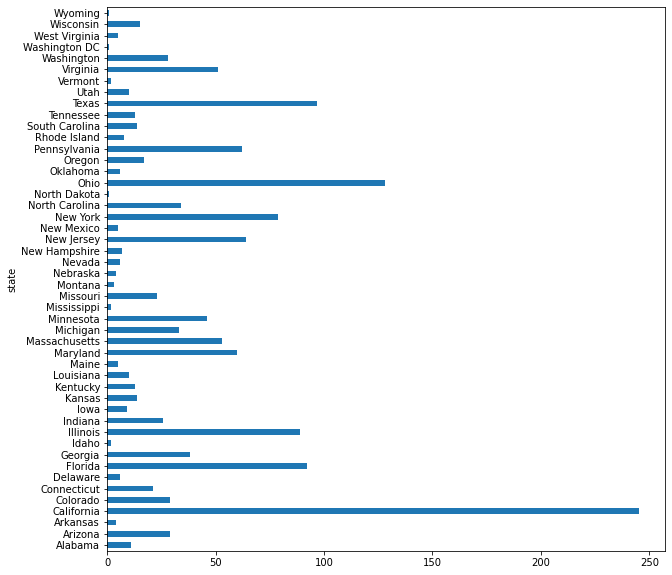

In [34]:
df2.plot.barh(figsize=(10,10))
#df2.plot.bar(figsize=(15,3))

In [22]:
if 0:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = ['C', 'C++', 'Java', 'Python', 'PHP']
    students = [23,17,35,29,12]
    ax.bar(langs,students)
    plt.show()
    N = 5
    menMeans = (20, 35, 30, 35, 27)
    womenMeans = (25, 32, 34, 20, 25)
    ind = np.arange(N) # the x locations for the groups
    width = 0.35
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(ind, menMeans, width, color='r')
    ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
    ax.set_yticks(np.arange(0, 81, 10))
    ax.legend(labels=['Men', 'Women'])
    plt.show()